In [2]:
from astropy.table import Table
from astropy.io import ascii
from astropy.io.votable import writeto, from_table
from plot import object_position2
import pandas as pd

In [2]:
tb = ascii.read('public/catalog_chinese_xray.csv')
writeto(tb, 'tables/catalog_chinese_xray.xml')

<MollweideAxes: xlabel='RA [$\\degree$]', ylabel='Dec [$\\degree$]'>

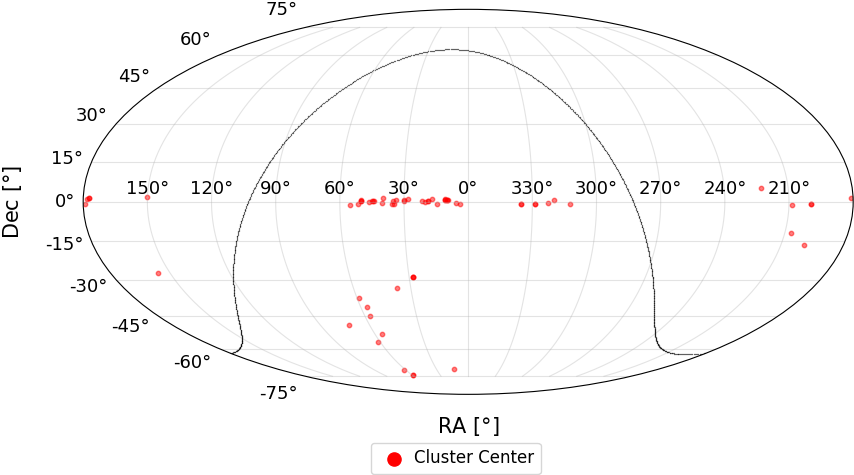

In [12]:
df = pd.read_csv('tables/catalog_chinese_xray_xmatch_splus.csv')
object_position2(ra=df.ra.values, dec=df.dec.values, sample=['Cluster Center']*len(df), color_map={'Cluster Center': 'red'}, size=10, projection='mollweide', save_path='plots/cluster_sky.png')

<MollweideAxes: xlabel='RA [$\\degree$]', ylabel='Dec [$\\degree$]'>

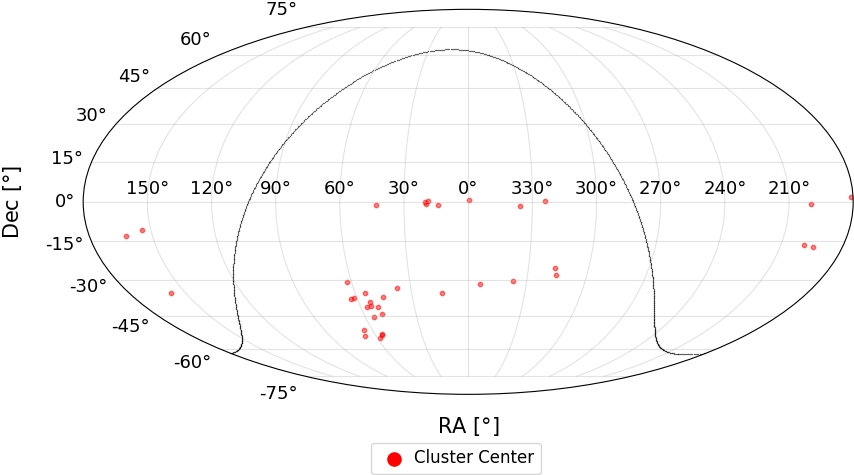

In [19]:
df = pd.read_csv('tables/catalog_chinese_xray_xmatch_splus_30arcsec.csv')
df = df.drop_duplicates(subset=['name'])
df2 = df[df.z < 0.1]
df2.to_csv('tables/catalog_chinese_xray_xmatch_splus_z0.1.csv', index=False)
object_position2(ra=df2.ra.values, dec=df2.dec.values, sample=['Cluster Center']*len(df2), color_map={'Cluster Center': 'red'}, size=10, projection='mollweide', save_path='plots/cluster_sky.png')

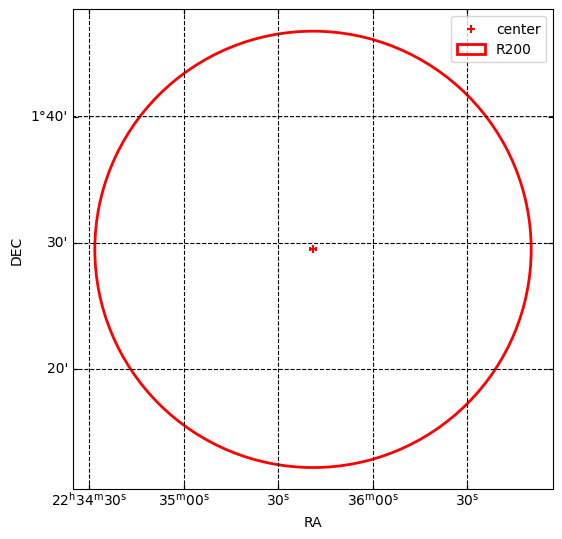

In [65]:
import numpy as np
from matplotlib.patches import Circle
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.wcs import WCS

wcs_spec =  {
  # 'CDELT1': -1.0,
  #            'CDELT2': 1.0,
  #            'CRPIX1': 8.5,
  #            'CRPIX2': 8.5,
             'CRVAL1': 338.920917,
             'CRVAL2': 1.491046,
             'CTYPE1': 'RA---AIT',
             'CTYPE2': 'DEC--AIT',
             'CUNIT1': 'deg',
             'CUNIT2': 'deg'}

wcs = WCS(wcs_spec)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs)

c_1 = Circle((338.920917, 1.491046), 0.2886960586670498, fc='none', lw=2, ec='r', transform=ax.get_transform('icrs'), label='R200')
# c_2 = Circle((261.003259, -30.6748939), 3, fc='red', transform=ax.get_transform('icrs'),)

# ax.imshow(np.ones((16, 16)), cmap='viridis')
ax.scatter([338.920917], [1.491046], c='red', marker='+', transform=ax.get_transform('icrs'), label='center')
ax.add_patch(c_1)
# ax.add_patch(c_2)
ax.grid('on', color='k', linestyle='--')
ax.tick_params(direction='in')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.legend()

# add galactic plane
# l = np.linspace(338.920917-0.2886960586670498, 338.920917+0.2886960586670498, 100)
# b = np.zeros_like(l)
# gp = SkyCoord(l, b, frame='galactic', unit='deg').transform_to('icrs')
# ax.plot(gp.ra.deg, gp.dec.deg, c='w', lw=1, transform=ax.get_transform('icrs'))
# ax.set_xlim(0, 15)
# ax.set_ylim(0, 15)

# plt.savefig('circle_gc_icrs.png', dpi=180)